In [1]:
#lets import some librabies and do some cleanup then remainig clean up will be done on the way

import ast                                      #this is used to convert sting type list into the actual list 
import pandas as pd
from datasets import load_dataset               #this is for our main data which is on luke's website
import matplotlib.pyplot as plt                 #for visualize the data


#now  getting the data from the luke's website using the datasets module 

dataset = load_dataset('lukebarousse/data_jobs')    #we will store data using dataset variable. 
                                                    #the data is dict type where the key "train" has the data


df = dataset['train'].to_pandas()           #the dataset variable contain our dataset as value paire named 'train'.
                                            #so we will call it just as we call values using key
                                            #we will store our data in df variable

#now we know that date column in dataset is not in  proper format so, we will clean it using pandas .to_datetime function.

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
type(df['job_posted_date']) #it worked date is now correct format


pandas.core.series.Series

In [4]:
#some random data to demonstrate pandas explode() method

data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

data

{'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
 'job_skills': [['excel', 'sql', 'python'],
  ['python', 'r'],
  ['aws', 'python', 'airflow']]}

In [5]:
type(data)

dict

In [6]:
df_skills = pd.DataFrame(data) #here we are converting the data, which was in dict type to dataframe, compatible with pandas

In [7]:
df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [8]:
type(df_skills) #see it is converted

pandas.core.frame.DataFrame

In [9]:
df_skills   #as you can see the job skill columns is as list of skill required for the each roles. 
            #However, you can't perform value count to see 
            #what skills are mentioned frequently. also you can't plot either. 
            #you can use loops but it will take to much time so it better to use 
            #explode function, and do value count and just plot.

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


<Axes: xlabel='job_skills'>

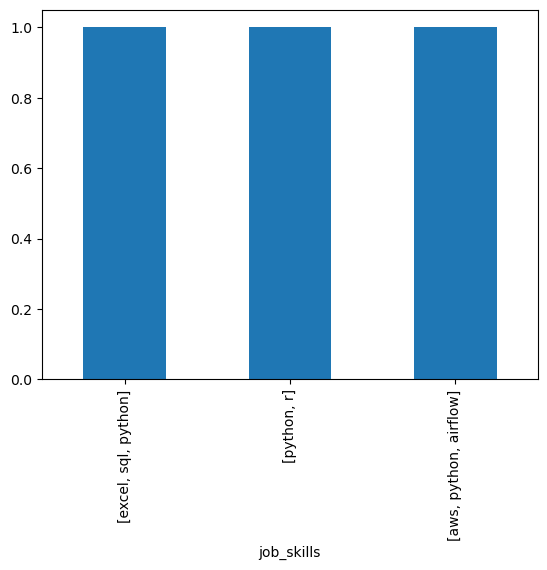

In [ ]:
df_skills['job_skills'].value_counts().plot(kind='bar') #as you can see it is counting one as a whole lsit not seperating it. so it is not useful

#it should be like python = 3, etc

In [12]:
df_skills.explode('job_skills') #explode will break the list of skill into its own rows.

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


<Axes: xlabel='job_skills'>

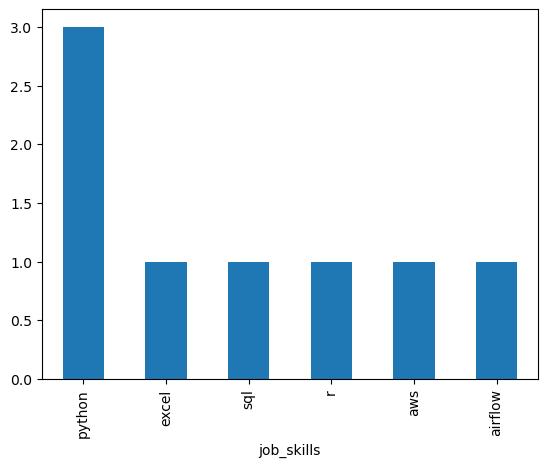

In [13]:
df_skills['job_skills'].explode().value_counts().plot(kind='bar') #here we are exploding the job_skill column and 
                                                                  #doing value counts to get the numbers and ploting it.


In [14]:
# now lets do it on the our data frame so we can plot top 10 skills for any job position
#but first we need to clean the job_skills column as it is stored as a string and for explode we need list 
#to check the type of it we need to give column name and index bcz it is in list. 

type(df['job_skills'][2])


str

In [15]:
# since it is string we need to convert it in to  the list so we can apply the explode method. 
#we can convert str to list by .ast method from python std lib.
#then how can you apply to the cloumn? simple using .apply() method


#lets do clean up

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

# we are assigning the job skills column to itself. we used .apply() method to change the column values into list then we use lambda function 
# #Bcx it inside the argument to apply we need to pass funtion (user define) or lambada. so here we used lambda. we did with user define in apply_
# function file. it staight run this without if statement we will get error bcz of the none in some of the row so we employed if statement so 
#it will check if the there is value then it will do the transformation (ie str to list) else if there none it will go to else and stay as none.
# bcz we are not providing anything. REMEMBER: if statement should have else to end it.


In [16]:
#lets see if it work or not by running type function on it.
type(df['job_skills'][2]) 


list

In [18]:
#now let run this on the dataframe df and we will assign to new dataframe name df_exploded

df_exploded =df.explode('job_skills')


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [19]:
df_exploded  #now you can check the job_skills column it break every skills into it own row


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


<Axes: xlabel='job_skills'>

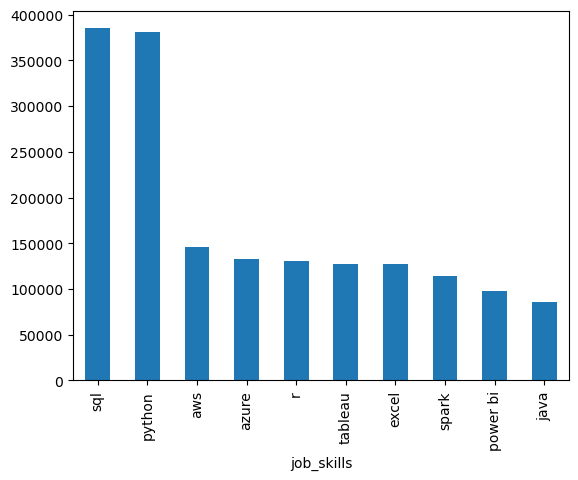

In [20]:
# since it is exploded and every skill has its own column we can use .value_count () method to cound the numebers of occurences of 
# each skills then we can plot it. 

df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')


In [23]:
#now previous cell is giving us the all skill count for all jobs. what if I want to see just for one particular role.
#simple use group by and plot it. But first create the two variable job_title and skills you can give any values for no.skills upto you

#then use group by to aggreage based on job roles and skills using group by() method then also run size() to get the count for the skills.

#lets do it

job_role = 'Data Analyst'  #make sure the name match with dataframe since it is case sensitive. this act as vairable fo diffn job roles. you can change as per need
top = 10 # i am giving  10 bcz I will plot top ten software to learn.

#now  lets creaate the skill count for each job roles, by grouping since it non numerical we will use size insted of count.
#also assing as skill count variable so it it easy to plot 

skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()

skill_count


job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [22]:
type(skill_count) #it is in series form we need it in dataframe bcz we are requiring many roles and series is good for one. for example if just
                  #want to do it for the the data analyst good, but what if you want to do it for multiple roles. are you gonna creeate new of every time.
                  #its best that you convert into dataframe. 


pandas.core.series.Series

In [24]:
#Since our skill count is data is in series we can actually convet into the dataframe by just nameing the index. TO set the 
# index we use .reset_index() and inside bracket we give name= name of the column. in our case I am going to give count as index. 
# lets convert
#we will assign to new variable as df_final 

df_final = skill_count.reset_index(name= 'skill_count') #now you can see the skill count being used as axis we will sort it to have 
                                                        # it in decending order by .sort_values() inside the coulmn name
                                                        #now it will act as x axis for skill count and y axis for skills name. and we have
                                                        #our variable to change so we can have graph for all roels just change the variable.
df_final    


,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


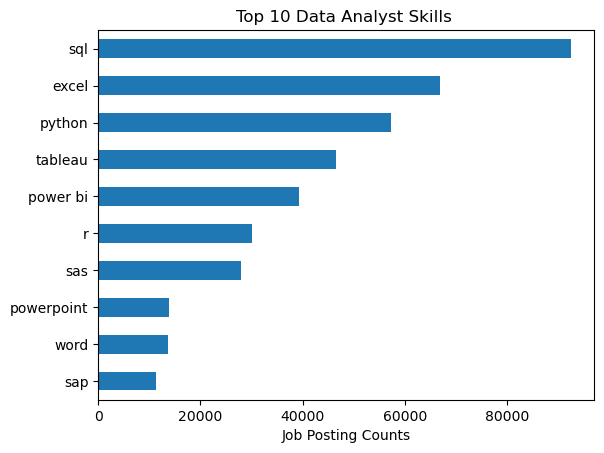

In [25]:
#lets just filter our data for just data analyst roels.
#we will filter it as per the variable we just definded two cell above as to get diffn job roels.(it is job role) then we will sort the values using 
#the index we ceated, skill_count, we will keep ascending = False so it will list from highest to lowest. then we will take top 10. Top is also a variable
#we defined along job_role it is to incoporate no of skoftware we want to see. then we will plot it since it is dataframe we will define x and y axis.

df_final[df_final['job_title_short']== job_role].sort_values('skill_count',ascending=False).head(top).plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top 10 {job_role} Skills ')
plt.xlabel('Job Posting Counts')
plt.ylabel('')
plt.legend().set_visible(False) #we are doing legend .set_visible (false) to remove the legend since it is for just one kind of data
#now you can see the sql is highest it is in at bottom but I want it to be on top. how to do it there are a couple of ways but I will use this so lets do
#it. To do that we need matplotlib's .gca(),invert y_axis 
 #gca means get current axis and invert means it will invert y axis. top to bottom and bottom will go to top.

